In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../../../../../../m/home/home5/56/kapoorj1/unix/repos/bayesian-ode'))
	print(os.getcwd())
except:
	pass


The following code tests the MALA sampler on a toy problem of 1-dimensional Bayesian Linear Regression.

In [2]:

import torch
import numpy as np
from samplers import MALA
from matplotlib import pyplot as plt



In [3]:

class MODEL(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y



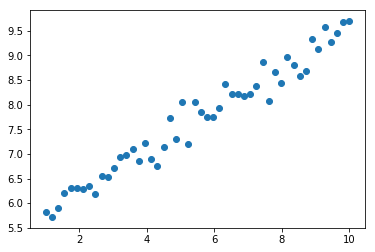

In [23]:

x_data = torch.Tensor([[x] for x in np.linspace(1, 10)])
w_true = 0.4
b_true = 5.5
y_data = x_data*w_true + b_true
y_data += torch.randn(y_data.size())*0.2
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))


In [24]:

model = MODEL()
sampler = MALA(model.parameters(), lr = 0.00003, add_noise=True)


<class 'dict'>


In [25]:
def closure():
    criterion = torch.nn.MSELoss(reduction='sum')
    loss = criterion(model(x_data), y_data)
    lambda_ = 1
    for p in model.parameters():
        loss += lambda_ * p.pow(2).sum()
    return loss


In [26]:
chain, logp_array = sampler.sample(closure, burn_in=10000, num_samples=2000)


Burn-in phase started
Sampling phase started


0.46286002

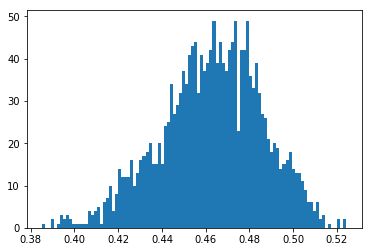

In [27]:
# plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]))
plt.hist([i[0][0][0][0][0] for i in chain if i[1]], bins=100)
np.mean([i[0][0][0][0][0] for i in chain if i[1]])

5.1080213

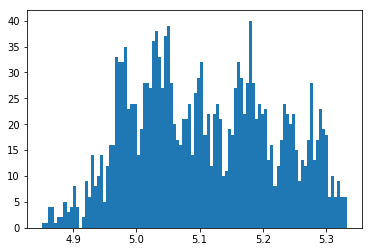

In [28]:
plt.hist([i[0][0][1][0] for i in chain if i[1]], bins=100)

np.mean([i[0][0][1][0] for i in chain if i[1]])

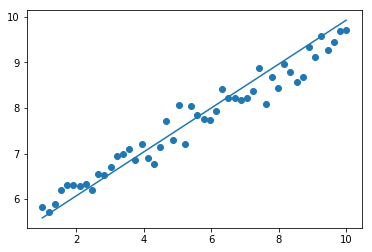

In [29]:
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))
plt.plot(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]))
